In [1]:
%run "docker_extract.py"
# import sys
# sys.path.insert(0, ".")

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from ipynb.fs.full.docker_extract import ExtractData 
from ipynb.fs.full.transformation_df import Transformation 
# from docker_extract import ExtractData


parent_dir=os.path.dirname(os.getcwd())
data_extractor=ExtractData()
df=pd.read_csv(os.path.join(parent_dir,"test_dataframe.csv"),index_col=0)

df.dropna(how='all', axis=1, inplace=True)
df.drop(["match_id.1","has_stats"],axis=1,inplace=True)
df=df[df['outcome'] != "RET"]
df=df[(~df['surface'].isna()) | (~df['indoor'].isna())]
# df=df[~df['surface'].isna() ]




In [3]:
import numpy as np

data_trans = Transformation(df)
data_trans()
new_df=data_trans.get_dataframe()
new_df.drop(['w_1st_in','l_1st_in','w_sv_gm_lset','l_sv_gm_lset','w_ace_set','l_ace_set','w_df_set','l_df_set','w_r_gm_w_set','l_r_gm_w_set','w_bp_set'],axis=1,inplace=True)
print(new_df.shape)
new_df=new_df[~new_df.isin([np.nan, np.inf, -np.inf]).any(1)]
print(new_df.shape)
new_df.dropna(inplace=True)
display(new_df)

(40105, 71)
(17166, 71)
       match_id  winner_id  loser_id       date  w_sf_rank  w_sf_elo  \
0        114497       2925      2434 2000-06-12      109.0    1752.0   
1        114497       2925      2434 2000-06-12      109.0    1752.0   
2        114498       2148      2834 2000-06-12       96.0    1798.0   
11       114518       1611      2998 2000-06-12        7.0    2167.0   
14       117977       2783      2093 2001-07-09       54.0    1901.0   
...         ...        ...       ...        ...        ...       ...   
46194    175115       5420      6409 2019-07-29       41.0    1969.0   
46197    175118       4921      4716 2019-07-29       33.0    2016.0   
46198    175122       5055     11787 2019-07-29       52.0    1932.0   
46199    175122       5055     11787 2019-07-29       52.0    1932.0   
46202    175125       5539      5763 2019-07-29      110.0    1807.0   

       w_i_o_rank  w_i_o_elo_rank  l_sf_rank  l_sf_elo  ...  w_r_game_w  \
0           105.0          1830.0   

/usr/local/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<AxesSubplot:>

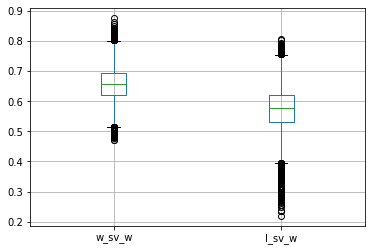

In [3]:
new_df.boxplot(['w_sv_w','l_sv_w'])

In [2]:
data_extractor.get_match_details(115019)

,surface,outcome,match_id,date,first_name,last_name,first_name,last_name
0,P,None,115019,2000-11-13,Chris,Woodruff,Jiri,Novak


In [5]:
import researchpy as rp

def ttest(column):
    return rp.ttest(group1=new_df["w"+column], group1_name= "Winner",
                    group2=new_df["l"+column], group2_name= "Loser")

In [6]:
columns=[column[1:] for column in new_df.columns if "w_" in column]

ttest_df=pd.DataFrame([])

for column in columns:
    data=[column[1:]]
    result=ttest(column)
    data.append(str(int(result[0]['N'][0])))
    data.append(str(round(result[0]['Mean'][0],2)))
    data.append(str(round(result[0]['Mean'][1],2)))
    data.append(str(round(result[1].iloc[0][1],2)))
    data.append(str(result[1].iloc[4][1]))
    data.append(str(result[1].iloc[5][1]))
    ttest_df=ttest_df.append(pd.Series(data),ignore_index=True)

ttest_df.columns=['Variable','N','Mean Winner','Mean Loser','Difference','Dif. < 0 p value','Dif. > 0 p value']
display(ttest_df)





,Variable,N,Mean Winner,Mean Loser,Difference,Dif. < 0 p value,Dif. > 0 p value
0,ace,25639,0.08,0.06,0.02,1.0,0.0
1,df,25639,0.04,0.05,-0.01,0.0,1.0
2,tt_p,25639,0.54,0.46,0.08,1.0,0.0
3,sv_w,25639,0.66,0.57,0.08,1.0,0.0
4,1st_w,25639,0.74,0.66,0.08,1.0,0.0
5,2nd_w,25639,0.53,0.45,0.08,1.0,0.0
6,bp_save,25639,0.57,0.51,0.06,1.0,0.0
7,r_1st_w,25639,0.34,0.26,0.08,1.0,0.0
8,bp_w,25639,0.49,0.43,0.06,1.0,0.0
9,rp_w,25639,0.43,0.34,0.08,1.0,0.0


In [7]:
from scipy.stats import chi2_contingency
import seaborn as sns
from tqdm import tqdm
def ch_calculate(df):
    factors_paired = [(i,j) for i in df.columns.values for j in df.columns.values] 

    chi2, p_values =[], []

    for f in tqdm(factors_paired):
        if f[0] != f[1]:
            chitest = chi2_contingency(pd.crosstab(df[f[0]], df[f[1]]))   
            chi2.append(chitest[0])
            p_values.append(chitest[1])
        else:      # for same factor pair
            chi2.append(0)
            p_values.append(0)

    chi2 = np.array(chi2).reshape((len(df.columns),len(df.columns))) # shape it as a matrix
    chi2 = pd.DataFrame(chi2, index=df.columns.values, columns=df.columns.values) # then a df for convenience
    return chi2
    

chi_square=ch_calculate(new_df[[i for i in new_df.columns if "w_" in i]])

100%|██████████| 784/784 [10:02<00:00,  1.30it/s]  


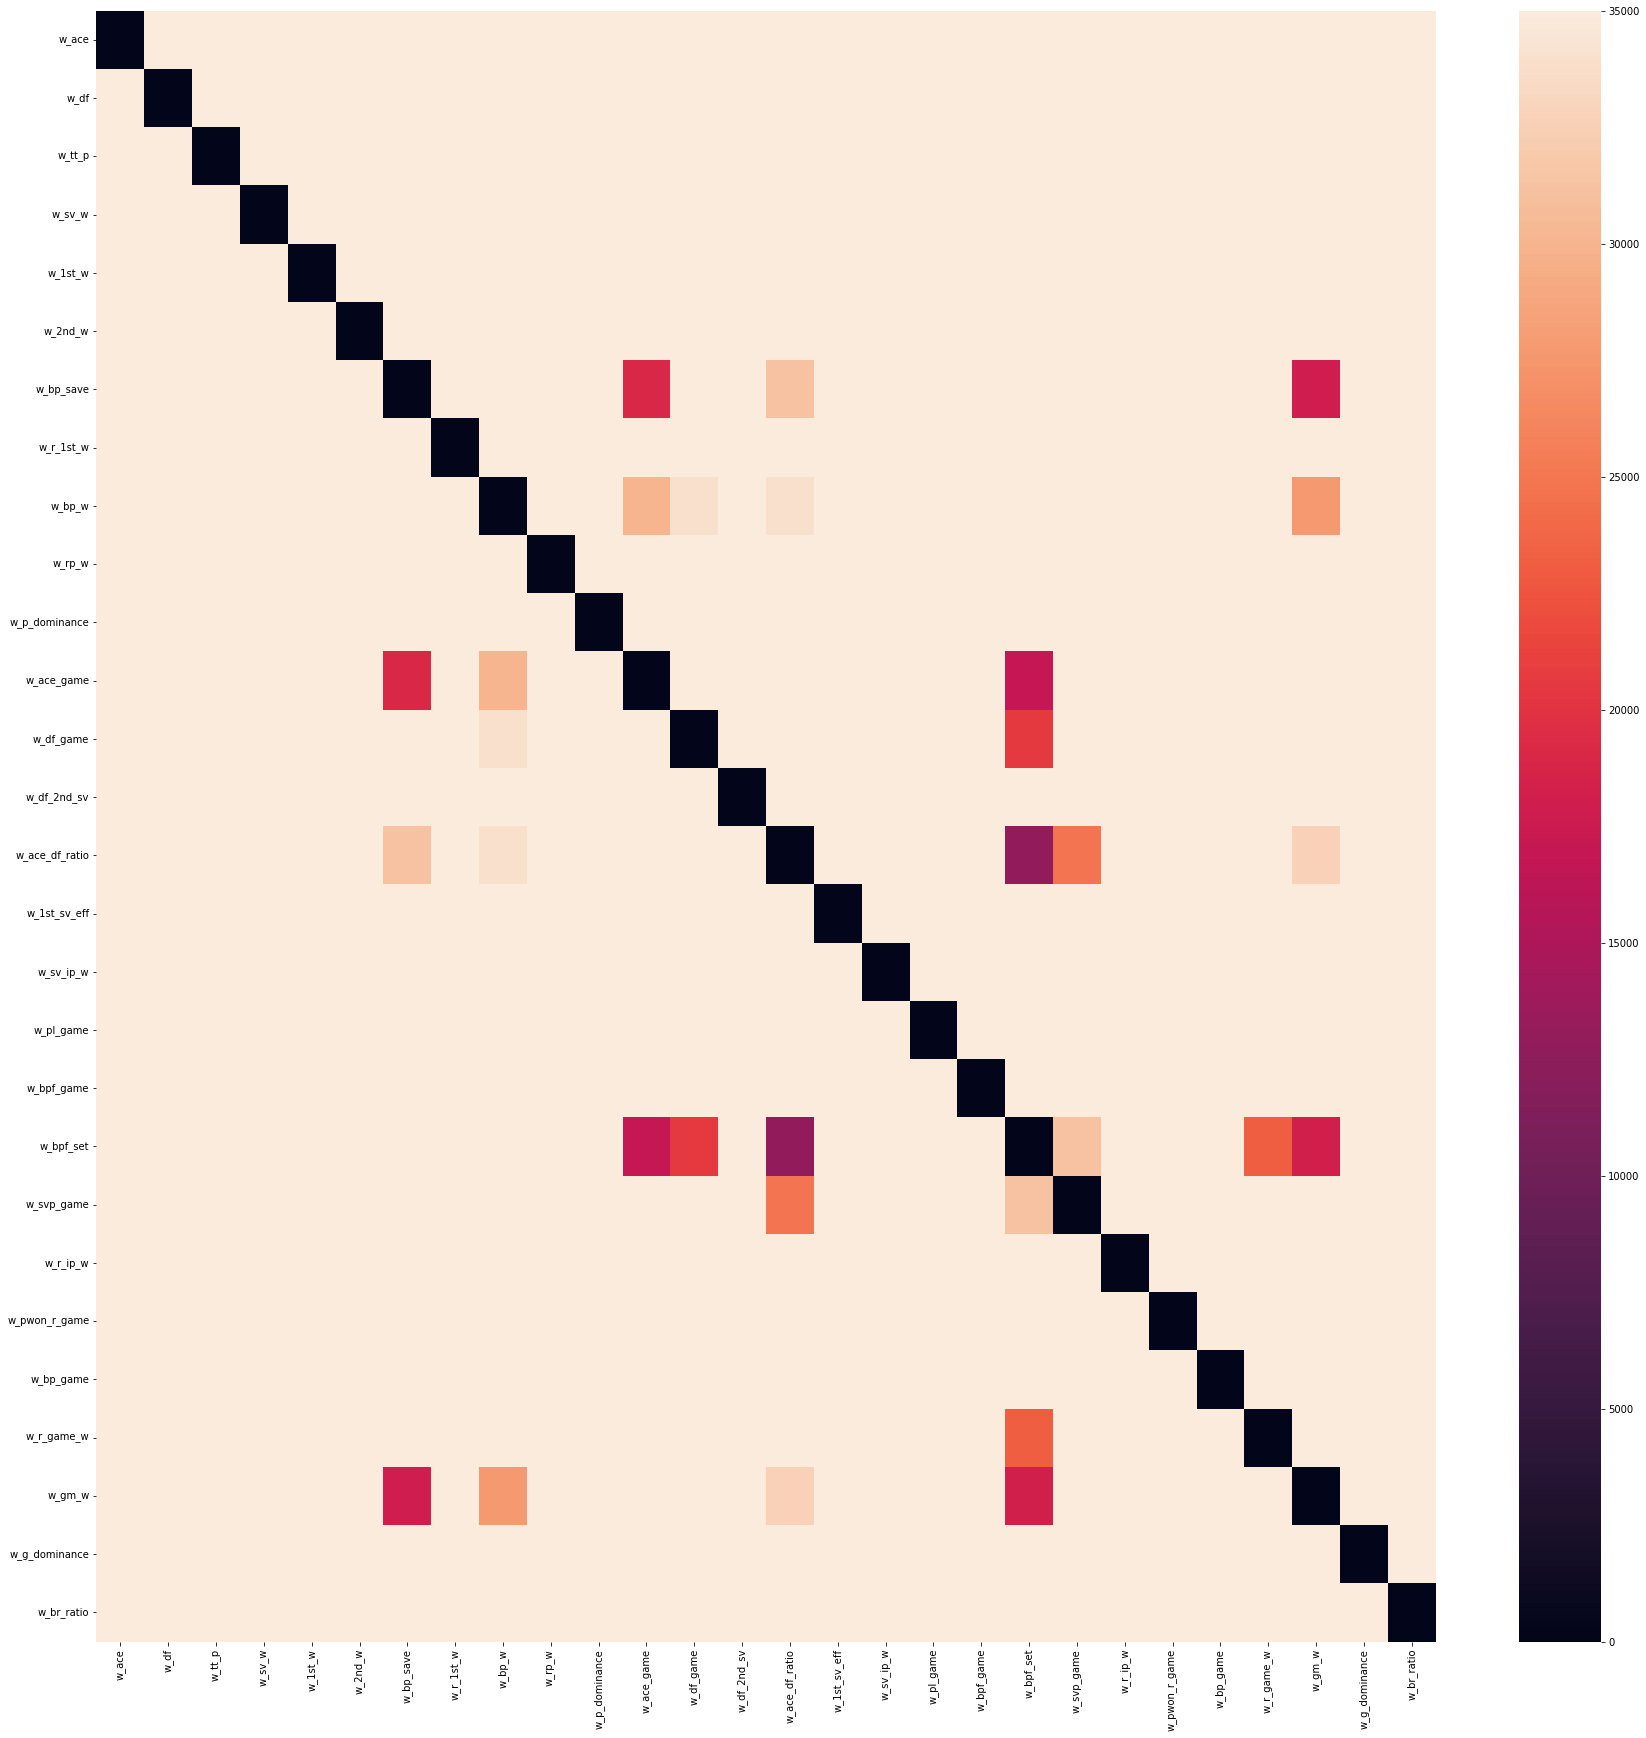

In [9]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(chi_square,vmin=0, vmax=35000)
plt.show()